In [8]:
# pip install matplotlib==3.4.2

     |████████████████████████████████| 10.3 MB 2.7 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [1]:
# Would require your authethication key. We could remove colab-specific portion for our actual submission.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
#had to change mansi's initial directory; might be easier this way; can change back if problematic
data = pd.read_csv('/content/drive/My Drive/5106_FBA_Team_Proj/Dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [4]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Summary:

*   Dataset Structure: 1470 observations (rows), 35 features (variables)
*   Missing Data: no missing data! this will make it easier to work with the dataset.
*   Data Type: We only have two datatypes in this dataset: categorical and integers
*   Label" Attrition is the label in our dataset and we would like to find out why employees are leaving the organization!
*   Imbalanced dataset: 1237 (84% of cases) employees did not leave the organization while 237 (16% of cases) did leave the organization making our dataset to be considered imbalanced since more people stay in the organization than they actually leave.

<h2> The Impact of Income towards Attrition </h2>
I wonder how much importance does each employee give to the income they earn in the organization. Here we will find out if it is true that money is really everything!<br>

<h3> Questions to Ask Ourselves </h3>
<ul>
    <li>What is the average monthly income by <b>department</b>? Are there any significant differences between individuals who quit and didn't quit? </li>
    <li>Are there significant changes in the <b>level of income by Job Satisfaction</b>? Are individuals with a <b>lower satisfaction</b> getting much less income than the ones who are more satisfied? </li>
    <li>Do employees who <b>quit the organization</b> have a much lower income than people who <b>didn't quit the organization</b>? </li>
    <li>Do employees with a higher performance rating earn more than with a lower performance rating? Is the difference significant by Attrition status? </li>
</ul><br>


<h3>Summary: </h3>
<ul>
    <li><b>Income by Departments: </b> Wow! We can see huge differences in each department by <b>attrition status. People with lower salaries had more attrition rate than the one’s being paid well.</b> </li>
    <li><b>Income by Job Satisfaction: </b> Hmm. It seems the lower the job satisfaction the<b> wider the gap</b> by attrition status in the levels of income. </li>
    <li><b>Attrition sample population: </b> I would say that most of this sample population has had a <b>salary increase</b> of less than 15% and a <b>monthly income</b> of less than 7,000 </li>
    <li><b>Exhaustion at Work: </b>  Over 54% of workers who left the organization worked<b> overtime</b>! Will this be a reason why employees are leaving?</li>
    <li><b>Differences in the DailyRate: </b><b>HealthCare Representatives </b>, <b>Sales Representatives </b>, and <b>Research Scientists </b> have the biggest daily rates differences in terms of employees who quit or didn't quit the organization. This might indicate that at least for the these roles, the sample population that left the organization was mainly because of income. </li>
</ul>

In [6]:
# setting a default figure size
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

# setting a default style
sns.set_style('darkgrid')

# setting tight layout
plt.figure(tight_layout=True)

# setting a default font sixe for labels
sns.set_context("paper", font_scale=1.5)
# sns.color_palette("rocket")
# sns.color_palette("rocket_r", as_cmap=True) Spectral
# sns.color_palette(‘pastel’) # 'hls'

<Figure size 864x576 with 0 Axes>

#### What is the average monthly income by department? Are there any significant differences between individuals who quit and didn't quit?

- Income by Departments: Wow! We can see huge differences in each department by attrition status. People with lower salaries had more attrition rate than the one’s being paid well.

Text(0, 0.5, 'Average Income')

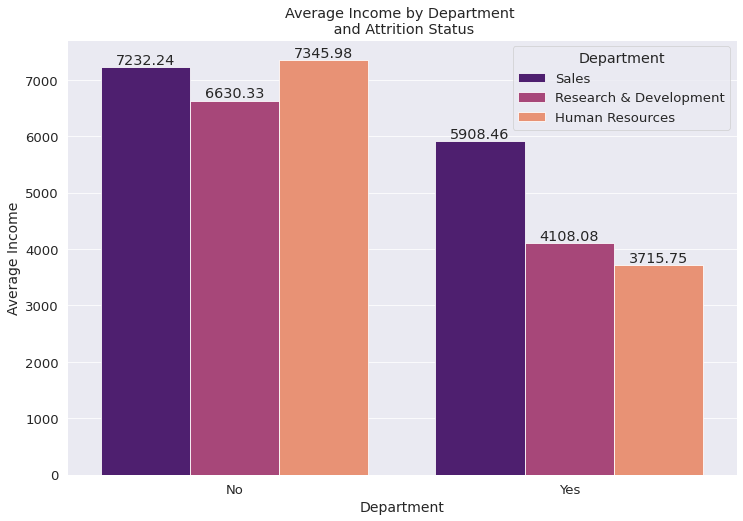

In [7]:
plt.title('Average Income by Department \n and Attrition Status')
plots = sns.barplot(x="Attrition", y="MonthlyIncome", hue="Department", order = ['No','Yes'],data=data, palette = 'magma', ci=None)#.set(xlabel='Department', ylabel='Average Income')
for container in plots.containers:
  plt.bar_label(container)
plt.xlabel("Department", size=14)
plt.ylabel("Average Income", size=14)

Text(0, 0.5, 'Average Income')

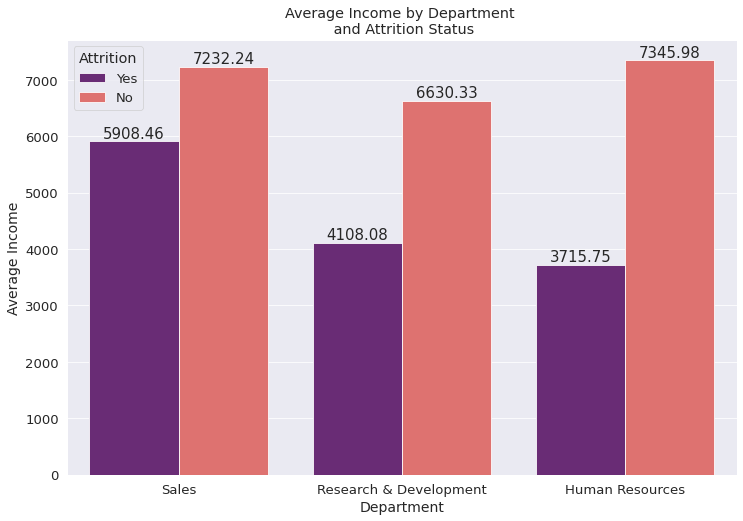

In [8]:
plt.title('Average Income by Department \n and Attrition Status')
# make two subplots side by side for one attrition = yes, another attrition =No; x = Department, y = MonthlyIncome
plots = sns.barplot(x="Department", y="MonthlyIncome", hue="Attrition", data=data, palette = 'magma',ci=None)#.set(xlabel='Department', ylabel='Average Income')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel("Department", size=14)
plt.ylabel("Average Income", size=14)
# sns.color_palette("rocket")
# sns.color_palette("rocket_r", as_cmap=True) Spectral

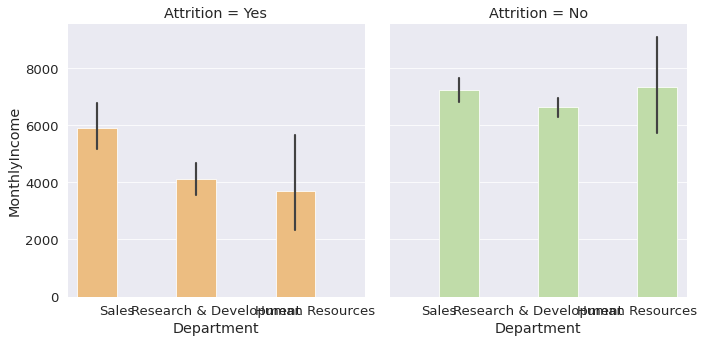

In [9]:
# plt.title('Average Income by Department \n and Attrition Status')
# make two subplots side by side for one attrition = yes, another attrition =No; x = Department, y = MonthlyIncome
sns.catplot(x="Department", y="MonthlyIncome", col='Attrition', hue='Attrition', kind = 'bar', data=data, palette = 'Spectral')#.set(xlabel='Department', ylabel='Average Income')


Text(0, 0.5, 'Median Income')

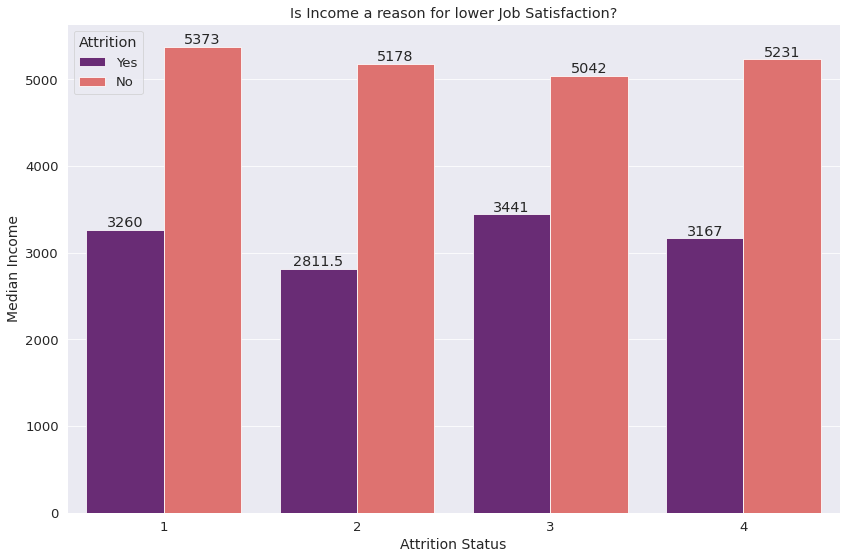

In [10]:
sns.set_style('darkgrid')
plt.figure(figsize = (12, 8), tight_layout=True)
plt.title('Is Income a reason for lower Job Satisfaction?')
from numpy import median
plots = sns.barplot(y="MonthlyIncome", x="JobSatisfaction", hue="Attrition", data=data, palette = 'magma',  estimator=median, ci=None)#.set(xlabel='Department', ylabel='Average Income')
for container in plots.containers:
  plt.bar_label(container)
plt.xlabel("Attrition Status", size=14)
plt.ylabel("Median Income", size=14)

<AxesSubplot:title={'center':'Average Income by Department \n and Attrition Status'}, xlabel='Attrition', ylabel='MonthlyIncome'>

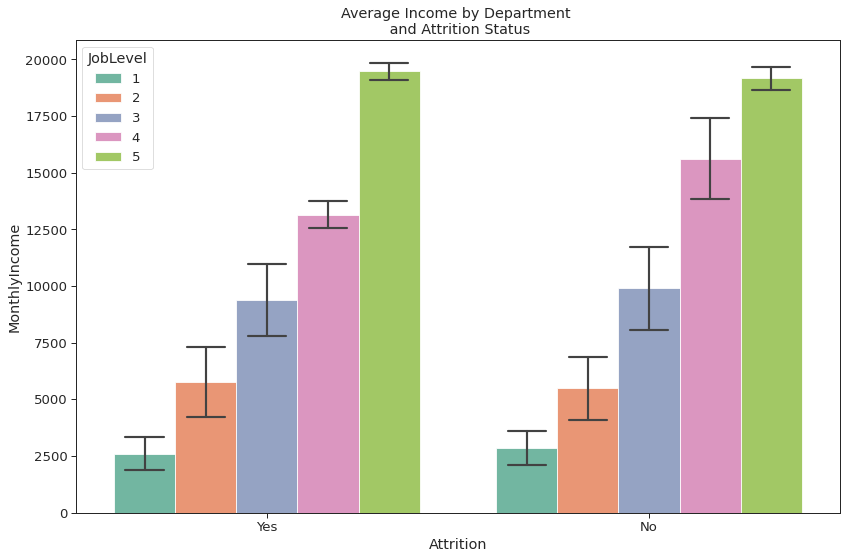

In [11]:
sns.set_style('ticks')
# sns.reset_orig()
plt.figure(figsize=(12,8), tight_layout=True)
plt.title('Average Income by Department \n and Attrition Status')
sns.barplot(x="Attrition", y="MonthlyIncome", hue="JobLevel", data=data, palette = 'Set2', ci = "sd", capsize = 0.1,) 
# sns.color_palette(‘pastel’) # 'hls'

<AxesSubplot:title={'center':'Average Income by Department \n and Attrition Status'}, xlabel='Attrition', ylabel='MonthlyIncome'>

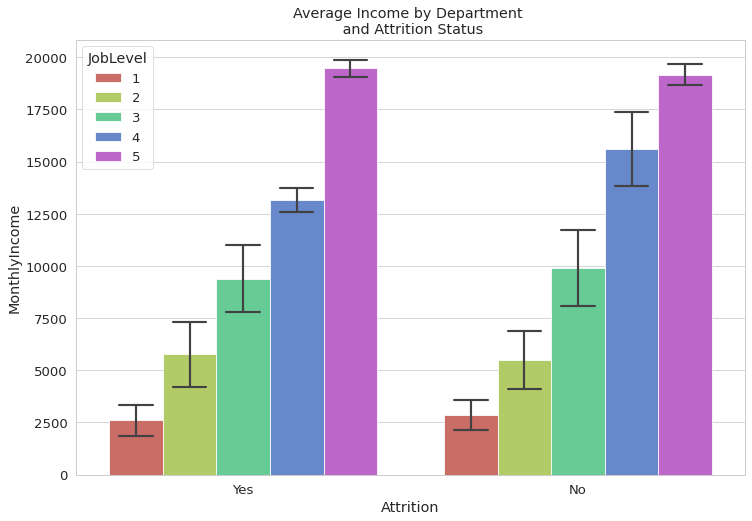

In [12]:

sns.set_style('whitegrid')
# sns.reset_orig()
plt.figure(figsize=(12,8))
#sns.countplot(x="Gender", hue="Attrition", data=hr[hr['Attrition'].isin(['Voluntary Resignation', 'Termination'])])

# attrition_counts = (hr.groupby(['Attrition'])['Department']
#                      .value_counts(normalize=True)
#                      .rename('percentage')
#                      .mul(100)
#                      .reset_index()
#                      .sort_values('BusinessTravel'))
plt.title('Average Income by Department \n and Attrition Status')
sns.barplot(x="Attrition", y="MonthlyIncome", hue="JobLevel", data=data, palette = 'hls', ci = "sd", capsize = 0.1) 

<AxesSubplot:title={'center':'Average Income by Department \n and Attrition Status'}, xlabel='Attrition', ylabel='MonthlyIncome'>

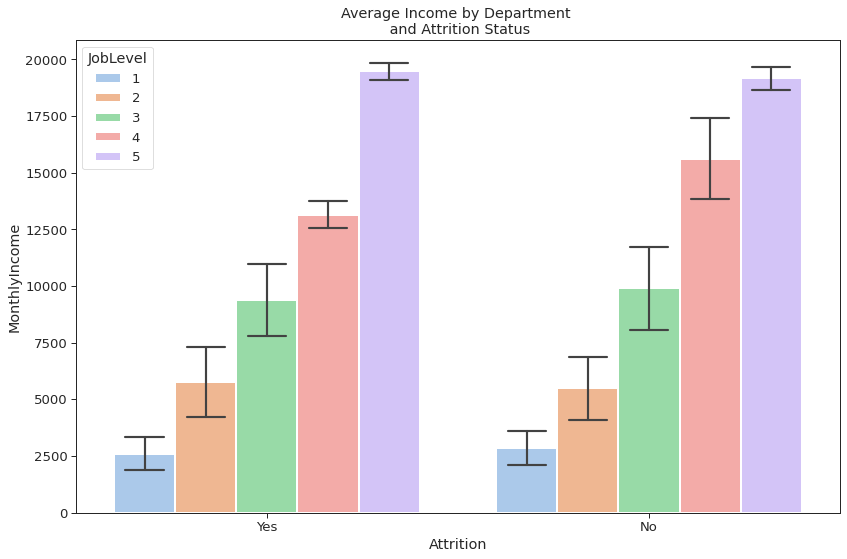

In [13]:

sns.set_style('ticks')
# sns.reset_orig()
plt.figure(figsize=(12,8), tight_layout=True)
plt.title('Average Income by Department \n and Attrition Status')
sns.barplot(x="Attrition", y="MonthlyIncome", hue="JobLevel", data=data, palette = 'pastel', ci = "sd", capsize = 0.1, linewidth=2) 
# sns.color_palette(‘pastel’) # 'hls'

<AxesSubplot:title={'center':'Average Income by Department \n and Attrition Status'}, xlabel='Attrition', ylabel='MonthlyIncome'>

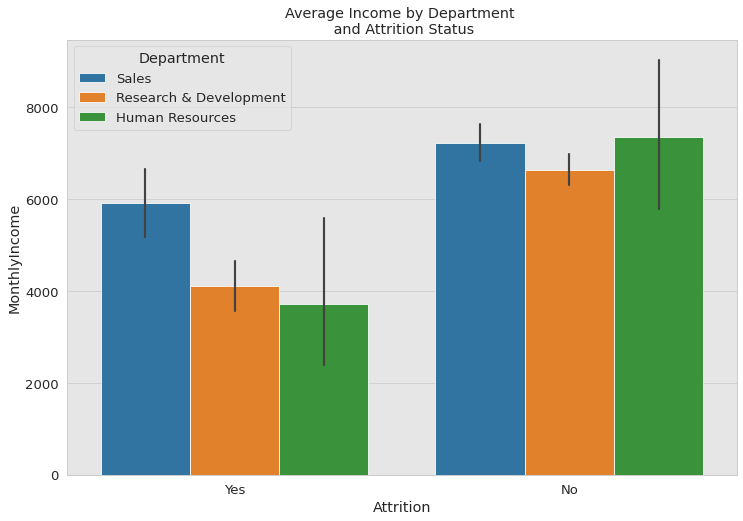

In [14]:
# Plot the distribution of females in this workplace
plt.figure(figsize=(12,8))
sns.axes_style()
sns.set_style('whitegrid', {"axes.facecolor": ".9"})
# sns.set_context("paper")
#sns.countplot(x="Gender", hue="Attrition", data=hr[hr['Attrition'].isin(['Voluntary Resignation', 'Termination'])])

# attrition_counts = (hr.groupby(['Attrition'])['Department']
#                      .value_counts(normalize=True)
#                      .rename('percentage')
#                      .mul(100)
#                      .reset_index()
#                      .sort_values('BusinessTravel'))
plt.title('Average Income by Department \n and Attrition Status')
sns.barplot(x="Attrition", y="MonthlyIncome", hue="Department", data=data) 

In [15]:
from plotnine import *
from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

- Exhaustion at Work: Over 54% of workers who left the organization worked overtime! Will this be a reason why employees are leaving?



In [16]:
# daily rates by JobRole
daily_r = data[['JobRole', 'Attrition', 'DailyRate']]#.groupby(['Attrition','JobRole'])

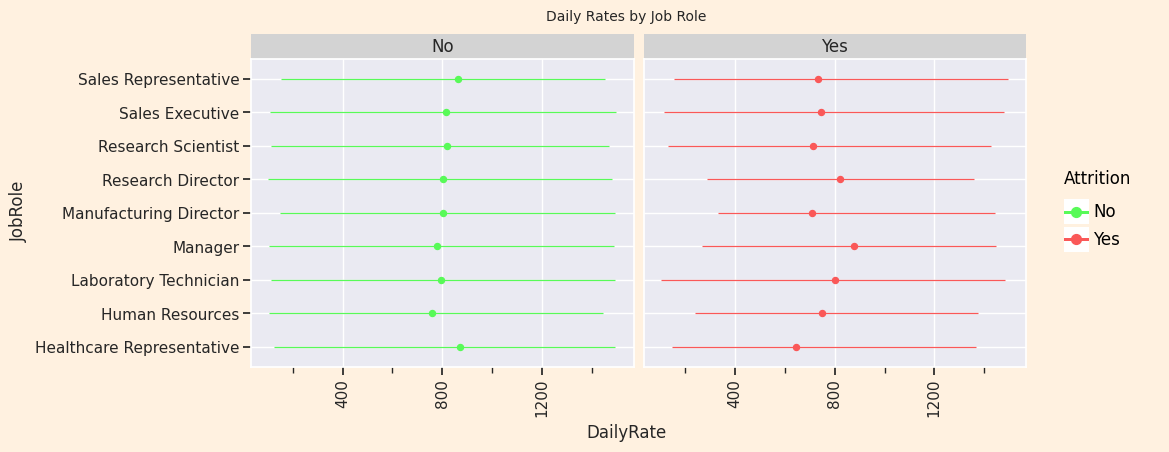

<ggplot: (8770708607253)>

In [17]:
gp = ggplot(daily_r, aes(
    x='JobRole', y='DailyRate', color='Attrition')) + facet_wrap(['Attrition']) + coord_flip() + theme_seaborn() + theme(
        axis_text_x = element_text(angle=90), plot_title=element_text(hjust=0.5, size=10), plot_background=element_rect(fill='#FFF1E0'), figure_size=(10, 4)) + stat_summary(
            fun_y = np.mean, fun_ymin=np.min, fun_ymax=np.max) + scale_color_manual(values=["#58FA58", "#FA5858"]) + labs(title="Daily Rates by Job Role")
gp

In [18]:
# What's the difference between in Dailyrates by attrition and jobrole status.
attrition_daily = data[data['Attrition'] == 'Yes'][['JobRole', 'Attrition', 'DailyRate']].groupby(['JobRole'])
avg_attrition = attrition_daily.mean().reset_index()#np.mean(attrition_daily['DailyRate'])
no_attrition_daily = data[data['Attrition'] == 'No'][['JobRole', 'Attrition', 'DailyRate']].groupby(['JobRole'])
avg_noattrition = no_attrition_daily.mean().reset_index()

In [19]:
colors = ["#316D15C", "#16D12C", "#B2D116", "#FEBE5D", "#FE9F5D", "#F86E2E", "#F8532E", "#FA451D", "#FA1D1D"]
colour_count = data['JobRole'].nunique()

In [20]:
combined_df = pd.merge(avg_attrition, avg_noattrition, on='JobRole')
combined_df 

,JobRole,DailyRate_x,DailyRate_y
0,Healthcare Representative,643.333333,869.811475
1,Human Resources,749.916667,760.325000
2,Laboratory Technician,802.645161,794.720812
3,Manager,876.600000,778.123711
4,Manufacturing Director,708.300000,802.518519
5,Research Director,823.000000,801.923077
6,Research Scientist,710.723404,817.555102
7,Sales Executive,746.350877,813.910781
8,Sales Representative,734.090909,862.340000


In [21]:
combined_df['pct_diff'] = round(((avg_noattrition['DailyRate'] - avg_attrition['DailyRate'])*100 / avg_noattrition['DailyRate']),2)#['DailyRate']

In [22]:
combined_df.sort_values('pct_diff', inplace=True)
combined_df['JobRole'] = pd.Categorical(combined_df.JobRole, categories=pd.unique(combined_df.JobRole))
combined_df

,JobRole,DailyRate_x,DailyRate_y,pct_diff
3,Manager,876.600000,778.123711,-12.66
5,Research Director,823.000000,801.923077,-2.63
2,Laboratory Technician,802.645161,794.720812,-1.00
1,Human Resources,749.916667,760.325000,1.37
7,Sales Executive,746.350877,813.910781,8.30
4,Manufacturing Director,708.300000,802.518519,11.74
6,Research Scientist,710.723404,817.555102,13.07
8,Sales Representative,734.090909,862.340000,14.87
0,Healthcare Representative,643.333333,869.811475,26.04


In [23]:
ggplot(aes(x=reorder(JobRole,pct_diff), y=pct_diff, fill=JobRole)) + geom_bar(stat="identity") + coord_flip() + theme_minimal() +
scale_fill_manual(values = colorRampPalette(brewer.pal(9, "Set2"))(colourCount)) + 
theme(plot.title=element_text(hjust=0.5, size=10), plot.background=element_rect(fill="#FFF1E0"), legend.position="none") + 
labs(x="JobRole", y="Percent Difference (%)", title="Percent Difference Charged by Day") + 
geom_label(aes(label=paste0(pct_diff, "%")), colour = "white", fontface = "italic", hjust=0.2)

plot_grid(daily_r, percent_diff, nrow=2)

p = ggplot(data = corr, mapping = aes(x='reorder(var2, value)', y='value')) 


# Determine order and create a categorical type
# Note that value_counts() is already sorted
manufacturer_list = mpg['manufacturer'].value_counts().index.tolist()[::-1]

(ggplot(mpg)
 + aes(x='manufacturer_cat')
 + geom_bar(size=20)
 + scale_x_discrete(limits=manufacturer_list)
 + coord_flip()
 + labs(y='Count', x='Manufacturer', title='Number of Cars by Make')
)

SyntaxError: ignored

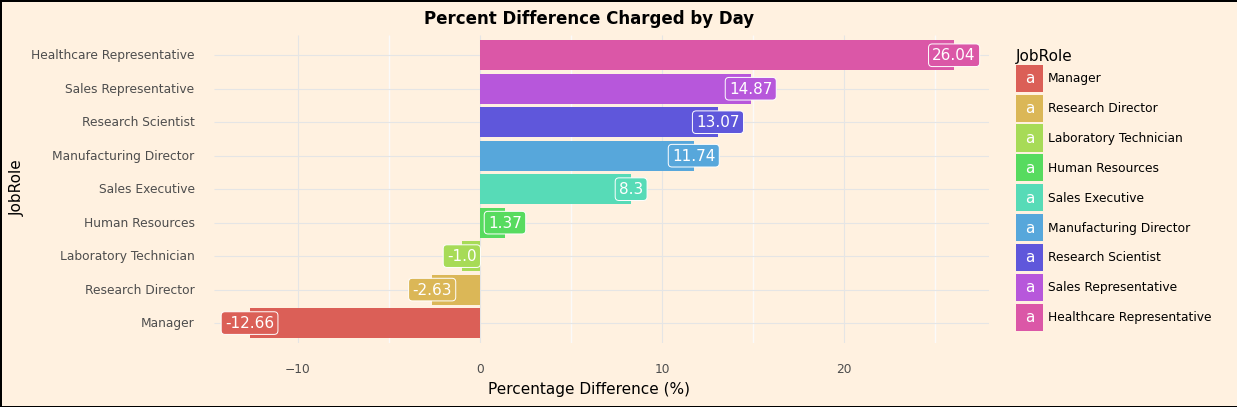

<ggplot: (8770706878877)>

In [24]:
pct_Diff = combined_df['pct_diff'].tolist()

ggplot(combined_df, aes(x='JobRole', y='pct_diff', fill ='JobRole')) + geom_bar(
    stat='identity') + coord_flip() + theme_minimal() + xlab("JobRole") + ylab('Percentage Difference (%)') + ggtitle("Percent Difference Charged by Day") + theme(
        plot_title=element_text(face='bold', hjust=0.5, size=12), plot_background=element_rect(fill='#FFF1E0'), figure_size=(10, 4)) + geom_label(
                aes(label='pct_diff'), color = 'white')